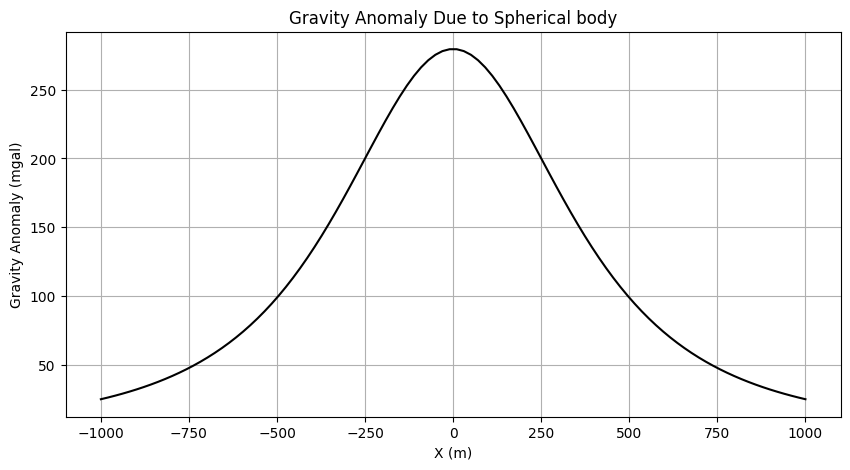

In [1]:
import numpy as np
import matplotlib.pyplot as plt
G = 6.674 * 10**-11  # Gravitational constant 
density_sphere = 2.5*1000  # Density of the sphere anomaly in kg/m^3
radius_sphere = 1000     # Radius of the sphere anomaly in meters  
z_center = 500          # Depth of the sphere anomaly in meters

# observation points 
x_obs = np.linspace(-1000, 1000, 100)

# gravity anomaly due to the sphere
g_anomaly = np.zeros_like(x_obs)
for i in range(len(x_obs)):
    x=x_obs[i]
    r = np.sqrt((x )**2 + (z_center)**2)  # Distance from observation point to center of the sphere
    g_anomaly[i] = 4/3 * np.pi * G * density_sphere * radius_sphere**3*(z_center)*10**5 / (r**3)

# Plotting gravity anomaly
plt.figure(figsize=(10, 5))
plt.plot(x_obs, g_anomaly, 'k-')
plt.xlabel('X (m)')
plt.ylabel('Gravity Anomaly (mgal)')
plt.title('Gravity Anomaly Due to Spherical body')
plt.grid(True)
plt.show()

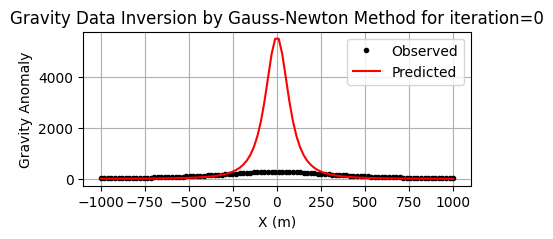

density guess= 2000
depth guess= 100


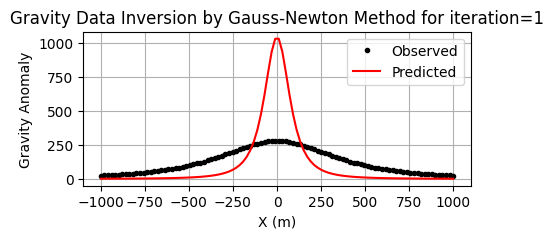

density guess= 449.6358854993716
depth guess= 109.76207016154964


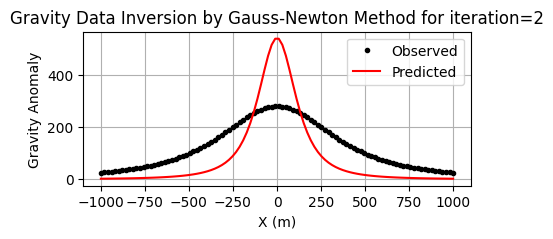

density guess= 523.8970016071706
depth guess= 164.61812073544405


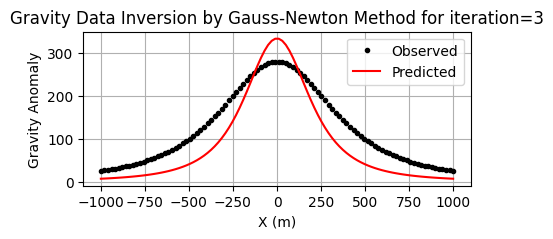

density guess= 968.2888221993455
depth guess= 284.8917343631284


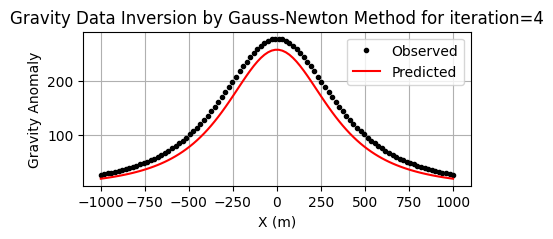

density guess= 1849.1860322044397
depth guess= 446.84353820538945


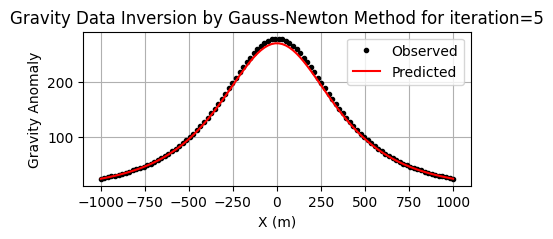

density guess= 2459.9012759604334
depth guess= 503.58199067539124


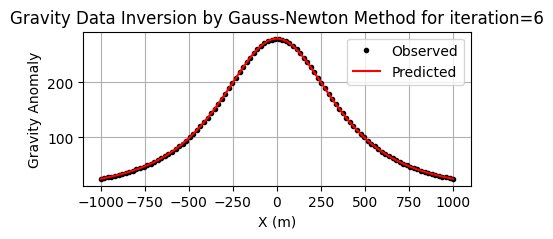

density guess= 2499.816145506248
depth guess= 499.88686984059274


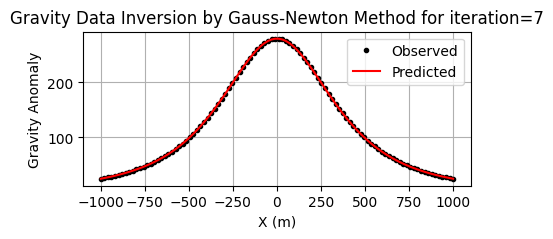

density guess= 2499.999816753562
depth guess= 499.9999547917006


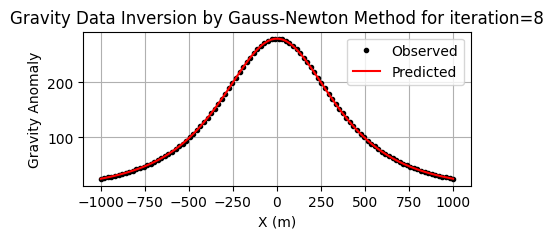

density guess= 2499.999999999971
depth guess= 499.99999999999477


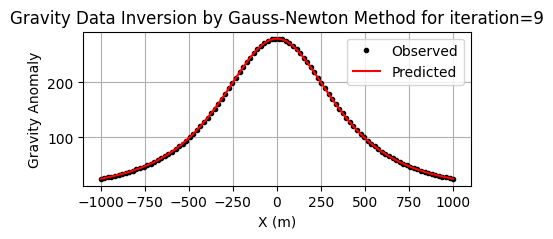

density guess= 2499.9999999999995
depth guess= 500.0


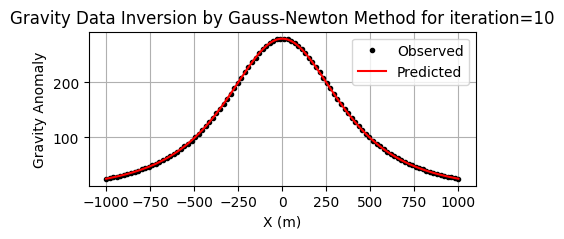

density guess= 2500.0
depth guess= 500.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import warnings 
# Generate synthetic gravity data
x_obs = np.linspace(-1000, 1000, 100)  
density_true = 2500                    
depth_true = 500                       
G = 6.674 * 1e-11                      
rad=1000
#observed gravity data
g_obs = (4/3)* np.pi * G * density_true*rad**3*(depth_true)/((x_obs**2 + (depth_true)**2)**(3/2))
# initial guess for density and depth
density_initial = 2000
depth_initial = 100
# Define Gauss-Newton iterations
max_iterations = 11
error=[]
for iteration in range(max_iterations):
    # predicted gravity anomaly using current estimates
    g_pred = (4/3)* np.pi * G * density_initial*rad**3*(depth_initial)/(x_obs**2 + (depth_initial)**2)**(3/2)
    # residual equal to difference between observed and predicted)
    residual = g_obs - g_pred
    # Jacobian matrix
    J = np.zeros((len(x_obs), 2))
    #plotting
    plt.figure(figsize=(5, 2))
    a=plt.plot(x_obs, g_obs*10**5, 'k.', label='Observed');
    b=plt.plot(x_obs, g_pred*10**5, 'r-', label='Predicted');
    error.append(np.max(g_obs*10**5-g_pred*10**5))
    plt.legend('Observed','Predicted');
    plt.xlabel('X (m)');
    plt.ylabel('Gravity Anomaly');
    plt.title('Gravity Data Inversion by Gauss-Newton Method for iteration='+str(iteration));
    plt.legend();
#     plt.text(-1000,250,"density guess="+str(np.round(density_initial,2)))
#     plt.text(-1000,200,"depth guess="+str(np.round(depth_initial,2)))
    plt.grid(True);
    plt.show();
    warnings.filterwarnings('ignore') 
    print("density guess=",density_initial)
    print("depth guess=",depth_initial)
    for i in range(len(x_obs)):
        r = np.sqrt(x_obs[i]**2 + (depth_initial)**2)
        J[i, 0] = (4/3)* np.pi * G * rad**3*(depth_initial) / (r**3)
        J[i, 1] = (4/3) * np.pi * G * density_initial * rad**3*(x_obs[i]**2-2*(depth_initial)**2) / (r**5)

    # Update guess using Gauss-Newton formula
    delta = np.linalg.inv(J.T @ J) @ J.T @ residual
    density_initial += delta[0]
    depth_initial += delta[1]
    

# Plot results
# plt.figure(figsize=(10, 5))
# plt.plot(x_obs, g_obs, 'k.', label='Observed')
# plt.plot(x_obs, g_pred, 'r-', label='Predicted')
# plt.xlabel('X (m)')
# plt.ylabel('Gravity Anomaly')
# plt.title('Gravity Data Inversion by Gauss-Newton Method')
# plt.legend()
# plt.grid(True)
# plt.show()
# print(density_initial,depth_initial)

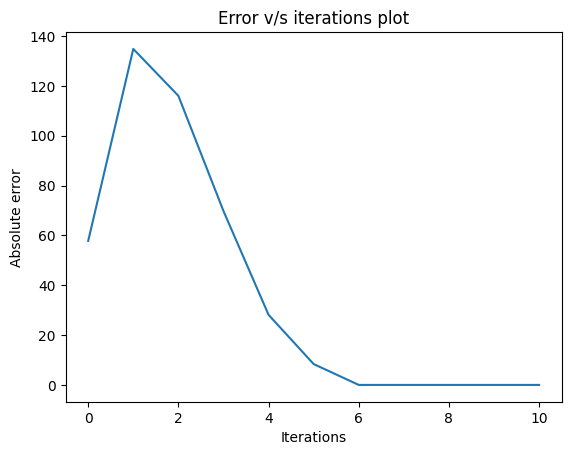

<Figure size 500x200 with 0 Axes>

In [3]:
plt.xlabel('Iterations');
plt.ylabel('Absolute error');
plt.title("Error v/s iterations plot")
plt.plot(error)
plt.figure(figsize=(5, 2));